## Experiment 1: Threshold of SNr delay

I will test the range of Str activation that enables delayed firing of SNr. First, I will find the minimal number of Str cells need to pass delay, and then test the delay property from minimum to maximum number of Str cells to ensure that latency distribution remains unchanged. 

When 0% of Str cells are activated,

Elapsed time is 0.791021 seconds.
Elapsed time is 0.778067 seconds.
Elapsed time is 0.770050 seconds.
Elapsed time is 0.731810 seconds.
Elapsed time is 0.758310 seconds.
Elapsed time is 0.776711 seconds.
Elapsed time is 0.780773 seconds.
Elapsed time is 0.772725 seconds.
Elapsed time is 0.738123 seconds.
Elapsed time is 0.713548 seconds.


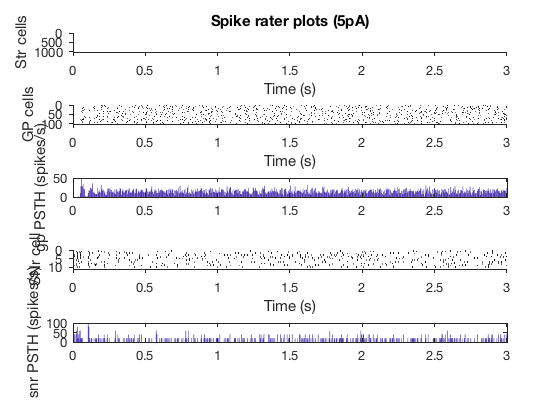

In [26]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
g_gp2snr = BGdelayline_setinit('stimCellsPer',0,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',0,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 50; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 50; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')



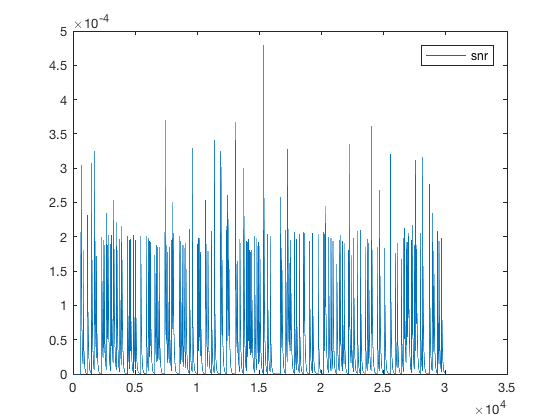

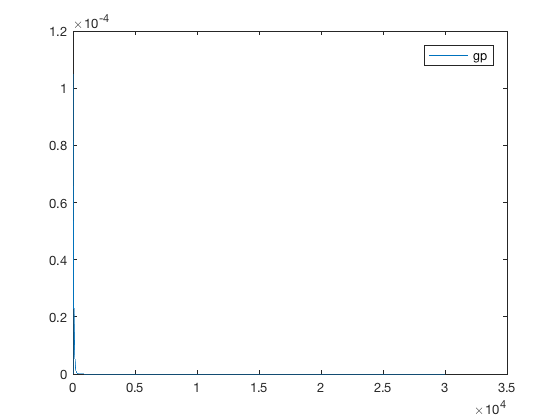

In [28]:
figure
plot(Igp(1,:))
legend('gp')

figure
plot(Isnr(1,:))
legend('snr')


There is no transimission of signals to GP and SNr. 

When 20% of cells are activated,

Elapsed time is 0.769210 seconds.
Elapsed time is 0.818941 seconds.
Elapsed time is 0.820478 seconds.
Elapsed time is 0.834880 seconds.
Elapsed time is 0.819286 seconds.
Elapsed time is 0.883754 seconds.
Elapsed time is 0.816439 seconds.
Elapsed time is 0.784529 seconds.
Elapsed time is 0.830961 seconds.
Elapsed time is 0.818495 seconds.


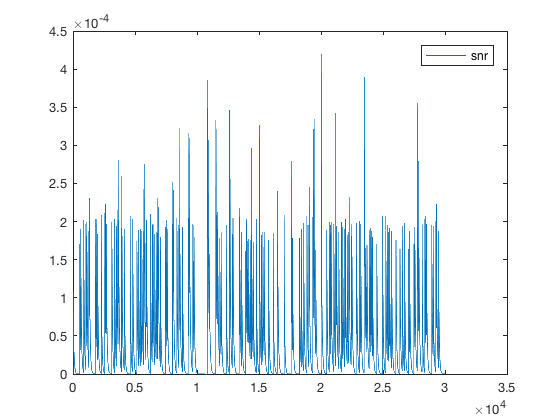

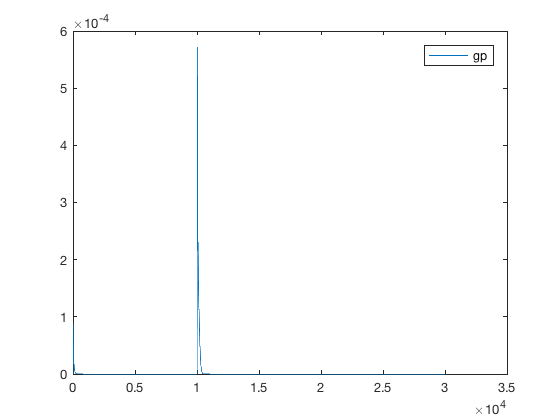

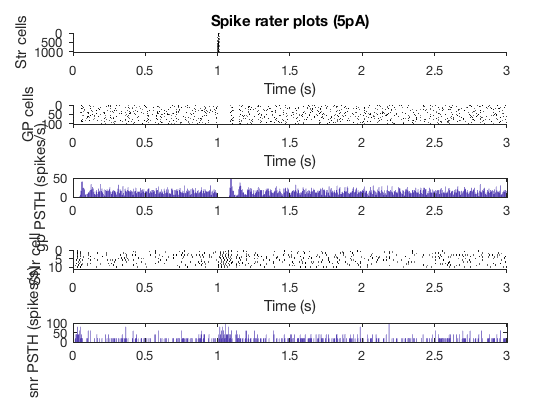

In [64]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
g_gp2snr = BGdelayline_setinit('stimCellsPer',50,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',50,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 50; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 50; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')


figure
plot(Igp(1,:))
legend('gp')

figure
plot(Isnr(1,:))
legend('snr')


In [62]:
g_gp2snr



g_gp2snr =

   3.2548e-90



The activation is not strong enough to inhibit firing of GP cells. 

Next, 50% of cells are activated

Elapsed time is 0.791021 seconds.
Elapsed time is 0.778067 seconds.
Elapsed time is 0.770050 seconds.
Elapsed time is 0.731810 seconds.
Elapsed time is 0.758310 seconds.
Elapsed time is 0.776711 seconds.
Elapsed time is 0.780773 seconds.
Elapsed time is 0.772725 seconds.
Elapsed time is 0.738123 seconds.
Elapsed time is 0.713548 seconds.


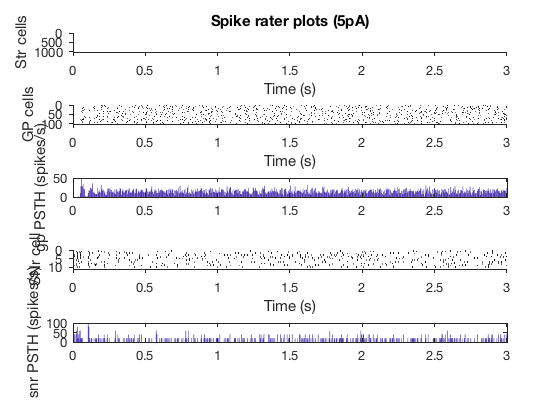

In [26]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];


%Runs 20s simulation without any stimulus to measure steady-state values. 
g_gp2snr = BGdelayline_setinit('stimCellsPer',50,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',50,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 50; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 50; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')



For 60%, 

In [30]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
Isyn_snr = [];

%Runs 20s simulation without any stimulus to measure steady-state values. 
g_gp2snr = BGdelayline_setinit('stimCellsPer',60,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

% I_ext = 6 is the number that matches Vthr - Vrest

for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str, Isyn_gp, Isnr, fr_gp] = BGdelayline('stimCellsPer',60,'I_exc_gp',0.00006,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
Isyn_snr = [Isyn_snr ; Isnr];
end

%%Plot
figure
subplot(5,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(5,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(5,1,4)

plotRaster(spk_snr);
ylabel('SNr cell')


binWidth_gp = 50; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(5,1,3)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 50; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(5,1,5)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0 length(spk_gp)*0.0001])
ylabel('snr PSTH (spikes/s)')



Error using BGdelayline
Too many output arguments.



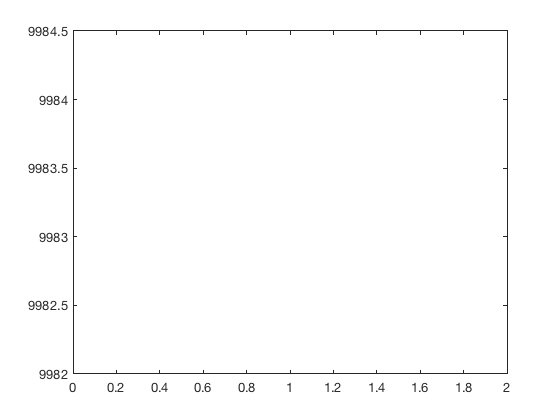

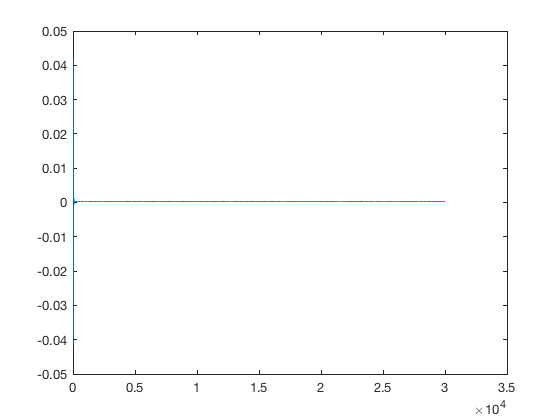

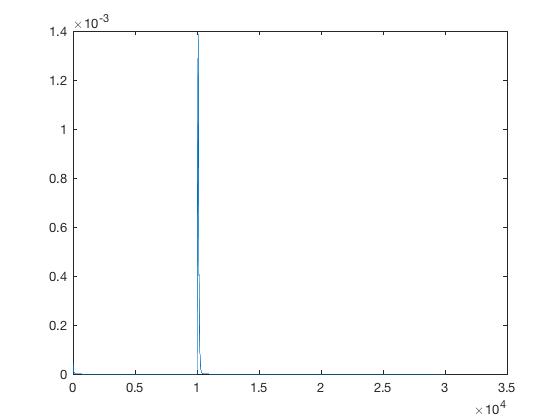

In [31]:
plot(mean(Isyn_gp,1))


figure
plot(Isnr)

figure
plot(fr_gp)


GP cells are inhibited and SNr cells disinhibited at 60% activation

Next, in order to find the threshold, I test the values between 50% and 60%.

Elapsed time is 0.882389 seconds.
Elapsed time is 0.815134 seconds.
Elapsed time is 0.795393 seconds.
Elapsed time is 0.836186 seconds.
Elapsed time is 0.777291 seconds.
Elapsed time is 0.775900 seconds.
Elapsed time is 0.855702 seconds.
Elapsed time is 0.823459 seconds.
Elapsed time is 0.781842 seconds.
Elapsed time is 0.779108 seconds.


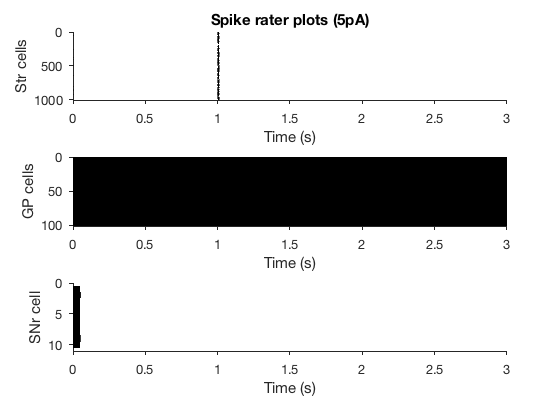

In [32]:
% Monte Carlo
spk_gp=[];
spk_snr=[];
spk_str=[];
for l = 1:10
%%Simulation
[Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellsPer',54);

spk_gp = [spk_gp; Vm_gp==15];
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end



%%Plot
figure
subplot(3,1,1)
plotRaster(spk_str);
title('Spike rater plots (5pA)')
ylabel('Str cells')
subplot(3,1,2)

plotRaster(spk_gp);
ylabel('GP cells')
subplot(3,1,3)

plotRaster(spk_snr);
ylabel('SNr cell')

The threshold of Str activation is ~54%.


## Does the amount of Str activation change the latency of SNr firing?

I will compare the onset of increase in SNr firing while changing the percentage of Str cell activation from 60 to 100, in increments of 10. ( 5 conditions)

Elapsed time is 0.894143 seconds.
Elapsed time is 0.864348 seconds.
Elapsed time is 0.840460 seconds.
Elapsed time is 0.831711 seconds.
Elapsed time is 0.833703 seconds.
Elapsed time is 0.851305 seconds.
Elapsed time is 0.889365 seconds.
Elapsed time is 0.842307 seconds.
Elapsed time is 0.831257 seconds.
Elapsed time is 0.854914 seconds.
Elapsed time is 0.856971 seconds.
Elapsed time is 0.897232 seconds.
Elapsed time is 0.797489 seconds.
Elapsed time is 0.824860 seconds.
Elapsed time is 0.854131 seconds.
Elapsed time is 0.827698 seconds.
Elapsed time is 0.837903 seconds.
Elapsed time is 0.783843 seconds.
Elapsed time is 0.826411 seconds.
Elapsed time is 0.843885 seconds.
Elapsed time is 0.839111 seconds.
Elapsed time is 0.852153 seconds.
Elapsed time is 0.831467 seconds.
Elapsed time is 0.803561 seconds.
Elapsed time is 0.868516 seconds.
Elapsed time is 0.846947 seconds.
Elapsed time is 0.850875 seconds.
Elapsed time is 0.855127 seconds.
Elapsed time is 0.821507 seconds.
Elapsed time i

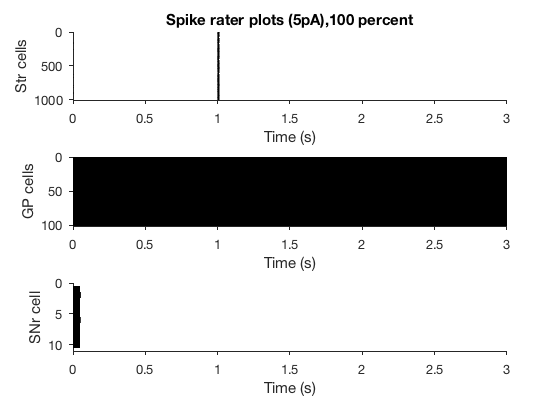

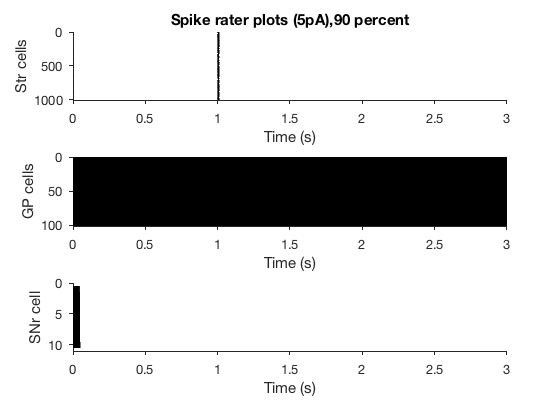

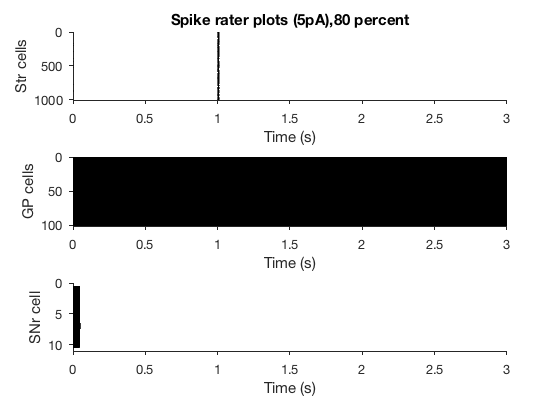

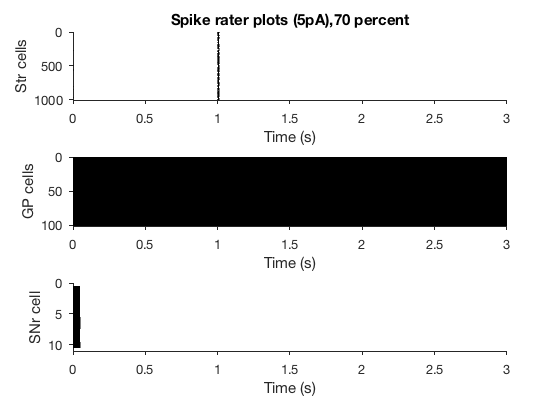

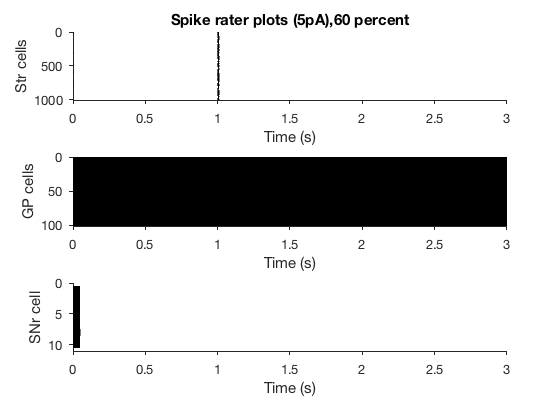

In [33]:
testRange = 10*(6:10);

for test_i = 1:length(testRange)
    spk_gp=[];
    spk_snr=[];
    spk_str=[];
    for l = 1:10
    %%Simulation
        [Vm_gp,Vm_snr,Vm_str] = BGdelayline('stimCellsPer',testRange(test_i));

        spk_gp  = [spk_gp; Vm_gp==15];
        spk_snr = [spk_snr; Vm_snr==15];
        spk_str = [spk_str; Vm_str==15];
    end

    %%Plot
    figure(test_i)
    subplot(3,1,1)
    plotRaster(spk_str);
    title(sprintf('Spike rater plots (5pA),%d percent',testRange(test_i)))
    ylabel('Str cells')
    subplot(3,1,2)

    plotRaster(spk_gp);
    ylabel('GP cells')
    subplot(3,1,3)

    plotRaster(spk_snr);
    ylabel('SNr cell')
    hold on
end

The latency for all conditions is roughly 6s, which is 1s after Str stimulation (at 5s)